In [117]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import mannwhitneyu


#importing the packges
import statsmodels.api as sm

import pandas as pd
import sklearn
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2,f_classif
import requests
import re
from padelpy import from_smiles
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [118]:
#Reading the rdrp_features1 file with the PIC50 column added to it i.e the rdrp_features_target.csv

In [119]:

data=pd.read_csv(r'C:\Users\DELL\Desktop\Dissertation\Data\prep_data\revised_data.csv')

In [120]:
data1=data.loc[:,'nAcid':]

In [121]:
data1

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,PIC50
0,0,-1.6280,2.650384,68.7976,65.547653,12,12,54,33,21,...,67.041060,2.031547,28.524969,10.239162,12.221042,3010,61,3.790,180,8.30
1,1,-2.8413,8.072986,68.9370,86.067376,20,22,73,41,32,...,84.634068,2.064246,25.883398,12.917043,12.966355,6482,65,5.604,224,7.30
2,0,-2.3901,5.712578,50.2168,87.427790,29,32,71,41,30,...,86.078253,2.099470,27.348234,5.134980,19.217432,5930,67,5.897,228,6.85
3,1,-4.9343,24.347316,74.4749,112.003720,32,36,94,54,40,...,113.083081,2.094131,35.452999,15.599584,19.853415,12839,93,6.101,306,6.42
4,1,-2.9752,8.851815,70.2295,91.885755,21,23,78,43,35,...,88.934519,2.068245,26.039310,9.935615,16.103695,7228,70,6.729,232,4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0,-1.4523,2.109175,137.2039,115.133271,15,17,99,52,47,...,105.757711,2.033802,40.446893,18.509336,15.503527,10598,93,3.672,292,8.00
2666,0,-0.1762,0.031046,87.8599,83.617341,15,16,74,37,37,...,75.864431,2.050390,24.191521,8.279940,15.911581,4527,62,6.398,202,4.52
2667,0,0.0749,0.005610,77.3859,97.470134,24,24,83,45,38,...,95.080986,2.112911,24.949352,18.294004,6.655348,6207,88,6.025,258,6.64
2668,0,-0.7585,0.575322,62.7250,66.632274,18,20,52,34,18,...,70.014863,2.059261,28.283749,12.964445,9.552321,2934,59,3.093,190,8.52


In [122]:
data.var()

<ipython-input-122-6bf595b3cfe5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


nAcid     3.987247e-01
ALogP     2.190886e+00
ALogp2    1.755555e+01
AMR       4.837280e+02
apol      2.593493e+02
              ...     
WPATH     4.376134e+06
WPOL      2.085352e+02
XLogP     5.339133e+00
Zagreb    1.745809e+03
PIC50     1.150943e+00
Length: 1011, dtype: float64

In [123]:
data=pd.DataFrame(data)

In [124]:
data1

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,PIC50
0,0,-1.6280,2.650384,68.7976,65.547653,12,12,54,33,21,...,67.041060,2.031547,28.524969,10.239162,12.221042,3010,61,3.790,180,8.30
1,1,-2.8413,8.072986,68.9370,86.067376,20,22,73,41,32,...,84.634068,2.064246,25.883398,12.917043,12.966355,6482,65,5.604,224,7.30
2,0,-2.3901,5.712578,50.2168,87.427790,29,32,71,41,30,...,86.078253,2.099470,27.348234,5.134980,19.217432,5930,67,5.897,228,6.85
3,1,-4.9343,24.347316,74.4749,112.003720,32,36,94,54,40,...,113.083081,2.094131,35.452999,15.599584,19.853415,12839,93,6.101,306,6.42
4,1,-2.9752,8.851815,70.2295,91.885755,21,23,78,43,35,...,88.934519,2.068245,26.039310,9.935615,16.103695,7228,70,6.729,232,4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0,-1.4523,2.109175,137.2039,115.133271,15,17,99,52,47,...,105.757711,2.033802,40.446893,18.509336,15.503527,10598,93,3.672,292,8.00
2666,0,-0.1762,0.031046,87.8599,83.617341,15,16,74,37,37,...,75.864431,2.050390,24.191521,8.279940,15.911581,4527,62,6.398,202,4.52
2667,0,0.0749,0.005610,77.3859,97.470134,24,24,83,45,38,...,95.080986,2.112911,24.949352,18.294004,6.655348,6207,88,6.025,258,6.64
2668,0,-0.7585,0.575322,62.7250,66.632274,18,20,52,34,18,...,70.014863,2.059261,28.283749,12.964445,9.552321,2934,59,3.093,190,8.52


In [125]:
#using sklearn variancethreshold to find constant features¶
from sklearn.feature_selection import VarianceThreshold
const = VarianceThreshold(threshold=0.7)
const.fit(data1) # 0.1 indicates 99% of observations approximately

VarianceThreshold(threshold=0.7)

In [126]:
#printing out all the features with constant values.
print(
    len([
        x for x in data1.columns
        if x not in data1.columns[const.get_support(indices=True)]
    ]))

[x for x in data1.columns if x not in data1.columns[const.get_support()]]


637


['nAcid',
 'nB',
 'nS',
 'nP',
 'nCl',
 'nBr',
 'nI',
 'AATSe',
 'AATSp',
 'ATSCe',
 'ATSCp',
 'AATSCc',
 'AATSCe',
 'AATSCp',
 'AATSCi',
 'AATSCs',
 'MATSc',
 'MATSm',
 'MATSv',
 'MATSe',
 'MATSp',
 'MATSi',
 'MATSs',
 'GATSc',
 'GATSm',
 'GATSv',
 'GATSe',
 'GATSp',
 'GATSi',
 'GATSs',
 'VE2_DzZ',
 'VE2_Dzm',
 'VE2_Dzm.1',
 'VE2_Dzv',
 'SM1_Dze',
 'VE2_Dze',
 'VE2_Dzp',
 'SM1_Dzi',
 'VE2_Dzi',
 'VE2_Dzs',
 'BCUTw-1l',
 'BCUTc-1l',
 'BCUTp-1l',
 'nBondsT',
 'nBondsQ',
 'SpMax_Bhm',
 'SpMin_Bhm',
 'SpMax_Bhv',
 'SpMin_Bhv',
 'SpMax_Bhe',
 'SpMin_Bhe',
 'SpMax_Bhp',
 'SpMin_Bhp',
 'SpMax_Bhi',
 'SpMin_Bhi',
 'SpMax_Bhs',
 'SpMin_Bhs',
 'C1SP1',
 'C2SP1',
 'C3SP3',
 'C4SP3',
 'SCH-3',
 'SCH-4',
 'SCH-5',
 'SCH-6',
 'SCH-7',
 'VCH-3',
 'VCH-4',
 'VCH-5',
 'VCH-6',
 'VCH-7',
 'SC-4',
 'SC-5',
 'SC-6',
 'VC-3',
 'VC-4',
 'VC-5',
 'VC-6',
 'ASP-0',
 'ASP-1',
 'ASP-2',
 'ASP-3',
 'ASP-4',
 'ASP-5',
 'ASP-6',
 'ASP-7',
 'AVP-0',
 'AVP-1',
 'AVP-2',
 'AVP-3',
 'AVP-4',
 'AVP-5',
 'AVP-6',
 'AVP

In [127]:

# we can then drop these columns from the train and test sets
data1 = const.transform(data1)


In [128]:

#getting feature names out 
data2=data[data.columns[const.get_support(indices=True)]]


In [129]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr(method ='pearson') #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(data2,0.8)
print('Correlated columns:',col)  

Correlated columns: {'Spe', 'naasC', 'ECCEN', 'SHCHnX', 'WPOL', 'GGI1', 'nT4Ring', 'nT12HeteroRing', 'ATSv', 'SpAbs_Dze', 'SpAD_Dzi', 'SHBint8', 'ZMIC2', 'maxssO', 'MPC3', 'AATSp', 'SpMAD_Dzv', 'SHBint6', 'nBondsS3', 'WPATH', 'SPC-5', 'ATSe', 'Sp', 'maxHBint7', 'maxdO', 'SpDiam_Dze', 'nwHBa', 'SpAbs_Dzp', 'MDEC-44', 'topoShape', 'ZMIC4', 'nBondsS2', 'ndCH2', 'MAXDN2', 'SpAbs_Dzm.1', 'SPC-4', 'SpDiam_Dzi', 'nBondsS', 'nT5Ring', 'SHBint4', 'MLFER_BH', 'nAtom', 'VE2_Dzm.1', 'Zagreb', 'MPC10', 'nHBAcc3', 'SdO', 'naaCH', 'mindssS', 'SpMax_Dzp', 'VE2_Dzi', 'VE2_Dzm', 'SpDiam_Dzm.1', 'nTG12Ring', 'SHBint9', 'SpMax_Dt', 'SpMAD_Dze', 'SsOH', 'DELS2', 'ETA_EtaP_L', 'ZMIC5', 'XLogP', 'SHBa', 'SwHBa', 'AMW', 'nHBAcc_Lipinski', 'minwHBd', 'MPC4', 'nAromBond', 'MIC0', 'SpMAD_Dzm', 'SpDiam_Dt', 'SpAbs_Dzv', 'piPC9', 'nHBAcc2', 'ndsCH', 'ATSs', 'SHBint2', 'MAXDP2', 'MPC8', 'ATSm', 'SwHBd', 'SRW4', 'TSRW', 'ATSp', 'maxHBint5', 'SpAbs_Dzm', 'SHdsCH', 'ETA_Eta_R', 'minaaaC', 'mindsN', 'MIC4', 'ZMIC3', 'S

In [130]:
data2.drop(columns=col,axis=1,inplace=True)


<ipython-input-130-ca85dcdc36c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(columns=col,axis=1,inplace=True)


In [131]:
data1

array([[-1.62800000e+00,  2.65038400e+00,  6.87976000e+01, ...,
         3.79000000e+00,  1.80000000e+02,  8.30000000e+00],
       [-2.84130000e+00,  8.07298569e+00,  6.89370000e+01, ...,
         5.60400000e+00,  2.24000000e+02,  7.30000000e+00],
       [-2.39010000e+00,  5.71257801e+00,  5.02168000e+01, ...,
         5.89700000e+00,  2.28000000e+02,  6.85000000e+00],
       ...,
       [ 7.49000000e-02,  5.61001000e-03,  7.73859000e+01, ...,
         6.02500000e+00,  2.58000000e+02,  6.64000000e+00],
       [-7.58500000e-01,  5.75322250e-01,  6.27250000e+01, ...,
         3.09300000e+00,  1.90000000e+02,  8.52000000e+00],
       [-3.81100000e-01,  1.45237210e-01,  6.34840000e+01, ...,
         3.06800000e+00,  1.96000000e+02,  8.52000000e+00]])

In [132]:
data3=pd.read_csv(r'C:\Users\DELL\Desktop\Dissertation\Data/prep_data/feature_selected_data/rdrp-data6.csv')

In [133]:
data3

,Unnamed: 0,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nP,...,nG12Ring,nF12Ring,nFG12Ring,n4HeteroRing,RotBFrac,LipinskiFailures,VE2_D,VR2_D,WTPT-2,PIC50
0,0,0,-1.6280,2.650384,68.7976,65.547653,12,0,4,0,...,0,0,0,0,0.138889,0,0.004507,10.151555,2.031547,8.301030
1,1,1,-2.8413,8.072986,68.9370,86.067376,20,0,4,0,...,0,0,0,0,0.217391,1,0.007464,12.915414,2.064246,7.301030
2,2,0,-2.3901,5.712578,50.2168,87.427790,29,0,6,0,...,0,0,0,0,0.170213,1,0.001662,11.702446,2.099470,6.853872
3,3,1,-4.9343,24.347316,74.4749,112.003720,32,0,6,0,...,0,0,0,0,0.177419,2,0.002994,27.707892,2.094131,6.420216
4,4,1,-2.9752,8.851815,70.2295,91.885755,21,0,5,0,...,0,0,0,0,0.208333,1,0.006758,13.484249,2.068245,4.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,2665,0,-1.4523,2.109175,137.2039,115.133271,15,0,5,0,...,1,0,3,0,0.155172,0,0.000807,25.559623,2.033802,8.000000
2666,2666,0,-0.1762,0.031046,87.8599,83.617341,15,0,5,0,...,0,0,0,0,0.195122,1,0.001391,14.037123,2.050390,4.522879
2667,2667,0,0.0749,0.005610,77.3859,97.470134,24,0,2,0,...,0,0,97,0,0.038462,1,0.003520,19.584382,2.112911,6.636388
2668,2668,0,-0.7585,0.575322,62.7250,66.632274,18,0,3,0,...,0,1,0,0,0.157895,0,0.006050,20.578794,2.059261,8.522879


In [134]:
data3['PIC50'].astype(int).value_counts()

7     811
6     765
5     667
8     324
4      64
9      25
3       9
10      4
1       1
Name: PIC50, dtype: int64

In [135]:
data3['PIC50'] = data3['PIC50'].astype(float)
data3['bioactivity_class'] = data3['PIC50'].map(lambda x : 'active' if x >=6.5 else ('inactive' if x<=6.5 else 'intermediate'))

In [136]:
data3 = data3[data3['bioactivity_class'] != 'intermediate']

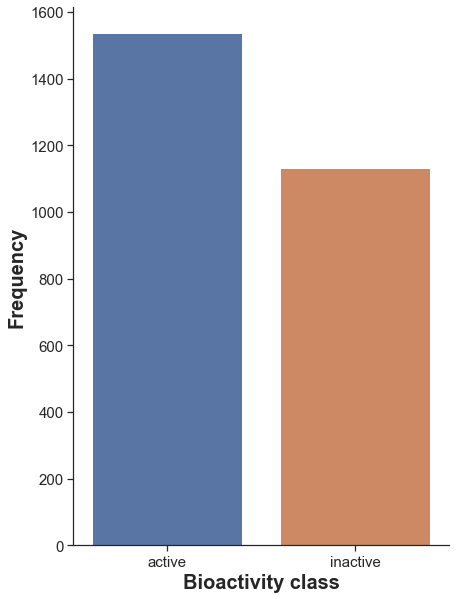

In [137]:
plt.figure(figsize=(6.5, 8.5))

sns.countplot(x='bioactivity_class', data=data3)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.set(style='ticks')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('plot_bioactivity_class.png')

In [138]:
data3['bioactivity_class'].value_counts()

active      1537
inactive    1133
Name: bioactivity_class, dtype: int64

In [139]:
df=data3

### Boxplot of pIC50

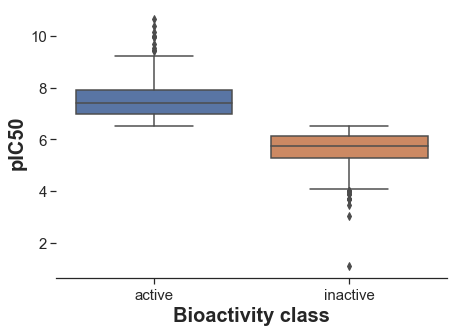

In [140]:
fig = plt.figure(figsize=(7,5))
sns.boxplot(x='bioactivity_class', y='PIC50', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('pIC50', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine(top=True, left=True)
plt.savefig('boxplot_pIC50.png',dpi=300);

### Boxplot of Lipinksi descriptors

## Statistical analysis | Mann-Whitney U Test

In [141]:
df

,Unnamed: 0,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nP,...,nF12Ring,nFG12Ring,n4HeteroRing,RotBFrac,LipinskiFailures,VE2_D,VR2_D,WTPT-2,PIC50,bioactivity_class
0,0,0,-1.6280,2.650384,68.7976,65.547653,12,0,4,0,...,0,0,0,0.138889,0,0.004507,10.151555,2.031547,8.301030,active
1,1,1,-2.8413,8.072986,68.9370,86.067376,20,0,4,0,...,0,0,0,0.217391,1,0.007464,12.915414,2.064246,7.301030,active
2,2,0,-2.3901,5.712578,50.2168,87.427790,29,0,6,0,...,0,0,0,0.170213,1,0.001662,11.702446,2.099470,6.853872,active
3,3,1,-4.9343,24.347316,74.4749,112.003720,32,0,6,0,...,0,0,0,0.177419,2,0.002994,27.707892,2.094131,6.420216,inactive
4,4,1,-2.9752,8.851815,70.2295,91.885755,21,0,5,0,...,0,0,0,0.208333,1,0.006758,13.484249,2.068245,4.522879,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,2665,0,-1.4523,2.109175,137.2039,115.133271,15,0,5,0,...,0,3,0,0.155172,0,0.000807,25.559623,2.033802,8.000000,active
2666,2666,0,-0.1762,0.031046,87.8599,83.617341,15,0,5,0,...,0,0,0,0.195122,1,0.001391,14.037123,2.050390,4.522879,inactive
2667,2667,0,0.0749,0.005610,77.3859,97.470134,24,0,2,0,...,0,97,0,0.038462,1,0.003520,19.584382,2.112911,6.636388,active
2668,2668,0,-0.7585,0.575322,62.7250,66.632274,18,0,3,0,...,1,0,0,0.157895,0,0.006050,20.578794,2.059261,8.522879,active


In [142]:
df['PIC50'].astype(int).value_counts()

7     811
6     765
5     667
8     324
4      64
9      25
3       9
10      4
1       1
Name: PIC50, dtype: int64

## Conclusion

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.


All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [143]:
data3.to_csv(r'C:\Users\DELL\Desktop\Dissertation\Data/prep_data/feature_selected_data/rdrp-data12.csv')